<a href="https://colab.research.google.com/github/Honggu12/Machine-Learning/blob/main/3_%EC%84%A0%ED%98%95_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 로지스틱 회귀
 - 선형함수(WX+B)에 시그모이드($sigma$)를 씌운 것
 - 선형함수에 의해 계산된 값을 0이나 1로 분류 되어질 확률을 구할 수 있다.


2. LinearSVC
 - SVM을 기반으로 각 추가 차원을 늘려서 수학적인 기교를 통해 분류하는 방식 

In [2]:
!pip install mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


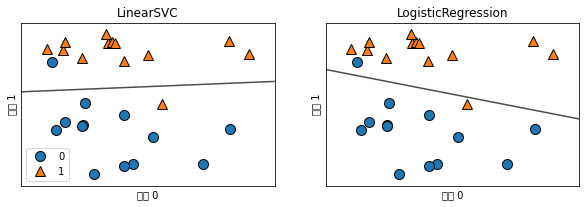

In [4]:
import mglearn
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

규제를 조절하는 c를 사용해서 가중치를 조절한다.

모델의 규제의 강도를 줄이거나 늘릴 수 있다.
- c가 높아지면 규제가 감소해서 가중치가 증가 ( 복잡도 증가 )
- c가 낮아지면 규제가 증가해서 가중치가 감소 ( 복잡도 감소 )

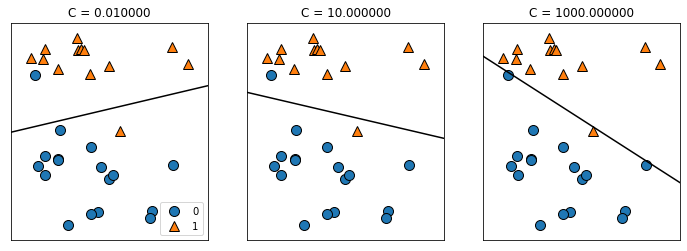

In [6]:
mglearn.plots.plot_linear_svc_regularization()

유방암 데이터셋 분류하기

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split( cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(log_reg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(log_reg.score(X_test, y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [18]:
log_reg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.6f}".format(log_reg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.6f}".format(log_reg100.score(X_test, y_test)))

훈련 세트 점수 : 0.981221
테스트 세트 점수 : 0.965035


In [19]:
log_reg001 = LogisticRegression(C=0.001, max_iter=10000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.6f}".format(log_reg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.6f}".format(log_reg001.score(X_test, y_test)))

훈련 세트 점수 : 0.953052
테스트 세트 점수 : 0.944056


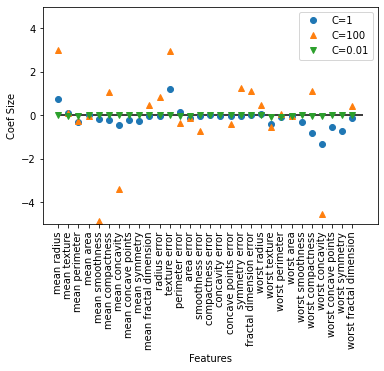

In [20]:
plt.plot(log_reg.coef_.T, 'o', label="C=1")
plt.plot(log_reg100.coef_.T, '^', label="C=100")
plt.plot(log_reg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Features")
plt.ylabel("Coef Size")
plt.legend()